In [1]:
import numpy as np
import math
from astropy import constants as c
from astropy import units as u
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [2]:
# define disk object and data reading routine
class disk(object):
    """
    Data container of the results of the viscous disk model.
    """
    def __init__(self):
        self.r         = np.zeros(0, dtype=np.float64)
        self.dr        = np.zeros(0, dtype=np.float64)
        self.time      = np.zeros(0, dtype=np.float64)
        self.sigma     = np.zeros((0,0), dtype=np.float64)
        self.sigmad    = np.zeros((0,0), dtype=np.float64)
        self.sice      = np.zeros((0,0), dtype=np.float64)
        self.sigmavap  = np.zeros((0,0), dtype=np.float64)
        self.sigmaplts = np.zeros((0,0), dtype=np.float64)
        self.dplts     = np.zeros((0,0), dtype=np.float64)
        self.dmdt     = np.zeros((0,0), dtype=np.float64)
        self.etamid    = np.zeros((0,0), dtype=np.float64)
        self.dustsize  = np.zeros((0,0), dtype=np.float64)
        self.stokesnr  = np.zeros((0,0), dtype=np.float64)
        self.tmid      = np.zeros((0,0), dtype=np.float64)
        self.mdot      = np.zeros((0,0), dtype=np.float64)
        self.mflux     = np.zeros((0,0), dtype=np.float64)
        self.mstar     = np.zeros(0, dtype=np.float64)
        self.nu        = np.zeros((0,0), dtype=np.float64)
        self.vr        = np.zeros((0,0), dtype=np.float64)
        self.vgas       = np.zeros((0,0), dtype=np.float64)
        self.alpha     = np.zeros((0,0), dtype=np.float64)
        self.mdisk     = np.zeros(0, dtype=np.float64)
        self.mdust     = np.zeros(0, dtype=np.float64)
        self.mplts     = np.zeros(0, dtype=np.float64)
        self.mvap      = np.zeros(0, dtype=np.float64)
        self.rsnow     = np.zeros(0, dtype=np.float64)
        self.FeS       = np.zeros(0, dtype=np.float64)

    def read(self):
        with open('time.info','r') as f:
            ntime = int(f.readline()) + 1
        with open('time.dat','r') as f:
            self.time = np.zeros(ntime)
            f.readline()
            for itime in range(ntime):
                self.time[itime] = float(f.readline())
        with open('grid.info','r') as f:
            nr = int(f.readline())
            f.readline()
            self.r = np.zeros(nr)
            self.dr = np.zeros(nr-1)
            for ir in range(nr):
                self.r[ir]=float(f.readline())
            self.dr       = self.r[1:]-self.r[:-1]
        self.sigma = np.zeros((ntime,nr))
        with open('sigma.dat','r') as f:
            f.readline()
            for itime in range(ntime):
                f.readline()
                for ir in range(nr):
                    self.sigma[itime,ir] = float(f.readline())
        self.sigmad = np.zeros((ntime,nr))
        with open('sigmad.dat','r') as f:
            f.readline()
            for itime in range(ntime):
                f.readline()
                for ir in range(nr):
                    self.sigmad[itime,ir] = float(f.readline())
        self.mflux = np.zeros((ntime,nr))
        with open('mflux.dat','r') as f:
            f.readline()
            for itime in range(ntime):
                f.readline()
                for ir in range(nr):
                    self.mflux[itime,ir] = float(f.readline())
        self.sigmaplts = np.zeros((ntime,nr))
        with open('sigmaplts.dat','r') as f:
            f.readline()
            for itime in range(ntime):
                f.readline()
                for ir in range(nr):
                    self.sigmaplts[itime,ir] = float(f.readline())
        self.sigmavap = np.zeros((ntime,nr))
        with open('sigmavap.dat','r') as f:
            f.readline()
            for itime in range(ntime):
                f.readline()
                for ir in range(nr):
                    self.sigmavap[itime,ir] = float(f.readline())
        self.sice = np.zeros((ntime,nr))
        with open('sigmaice.dat','r') as f:
            f.readline()
            for itime in range(ntime):
                f.readline()
                for ir in range(nr):
                    self.sice[itime,ir] = float(f.readline())
        self.etamid = np.zeros((ntime,nr))
        with open('etamid.dat','r') as f:
            f.readline()
            for itime in range(ntime):
                f.readline()
                for ir in range(nr):
                    self.etamid[itime,ir] = float(f.readline())
        self.dustsize = np.zeros((ntime,nr))
        with open('dustsize.dat','r') as f:
            f.readline()
            for itime in range(ntime):
                f.readline()
                for ir in range(nr):
                    self.dustsize[itime,ir] = float(f.readline())
        self.stokesnr = np.zeros((ntime,nr))
        with open('stokesnr.dat','r') as f:
            f.readline()
            for itime in range(ntime):
                f.readline()
                for ir in range(nr):
                    self.stokesnr[itime,ir] = float(f.readline())
        self.mdot = np.zeros((ntime,nr))
        with open('mdot.dat','r') as f:
            f.readline()
            for itime in range(ntime):
                f.readline()
                for ir in range(nr):
                    self.mdot[itime,ir] = float(f.readline())
        self.tmid = np.zeros((ntime,nr))
        with open('temperature.dat','r') as f:
            f.readline()
            for itime in range(ntime):
                f.readline()
                for ir in range(nr):
                    self.tmid[itime,ir] = float(f.readline())
        self.nu = np.zeros((ntime,nr))
        with open('visc.dat','r') as f:
            f.readline()
            for itime in range(ntime):
                f.readline()
                for ir in range(nr):
                    self.nu[itime,ir] = float(f.readline())
        self.vr = np.zeros((ntime,nr))
        with open('vdust.dat','r') as f:
            f.readline()
            for itime in range(ntime):
                f.readline()
                for ir in range(nr):
                    self.vr[itime,ir] = float(f.readline())
        self.vgas = np.zeros((ntime,nr))
        with open('velo.dat','r') as f:
            f.readline()
            for itime in range(ntime):
                f.readline()
                for ir in range(nr):
                    self.vgas[itime,ir] = float(f.readline())
        self.alpha = np.zeros((ntime,nr))
        with open('alpha.dat','r') as f:
            f.readline()
            for itime in range(ntime):
                f.readline()
                for ir in range(nr):
                    self.alpha[itime,ir] = float(f.readline())
        self.mstar = np.zeros((ntime))
        with open('mstar.dat','r') as f:
            f.readline()
            for itime in range(ntime):
                self.mstar[itime] = float(f.readline())
        self.mdisk = np.zeros(ntime)
        for itime in range(ntime):
            tprsigma = self.sigma[itime,:]*2*math.pi*self.r
            tprsav   = 0.5*(tprsigma[1:]+tprsigma[:-1])
            dr       = self.r[1:]-self.r[:-1]
            dum      = tprsav*dr
            self.mdisk[itime] = dum.sum()
        self.mdust = np.zeros(ntime)
        for itime in range(ntime):
            tprsigmad = (self.sigmad[itime,:])*2*math.pi*self.r
            tprsav   = 0.5*(tprsigmad[1:]+tprsigmad[:-1])
            dum      = tprsav*dr
            self.mdust[itime] = dum.sum()
        self.mplts = np.zeros(ntime)
        for itime in range(ntime):
            tprsigmap = (self.sigmaplts[itime,:])*2*math.pi*self.r
            tprsav   = 0.5*(tprsigmap[1:]+tprsigmap[:-1])
            dum      = tprsav*dr
            self.mplts[itime] = dum.sum()
        self.mvap = np.zeros(ntime)
        for itime in range(ntime):
            tprsigmav = (self.sigmavap[itime,:])*2*math.pi*self.r
            tprsav   = 0.5*(tprsigmav[1:]+tprsigmav[:-1])
            dum      = tprsav*dr
            self.mvap[itime] = dum.sum()
        self.dplts = np.zeros((ntime,nr))
        self.dmdt = np.zeros((ntime,nr))
        bla = np.zeros((nr))
        self.rsnow = np.zeros(ntime)
        for itime in range(1,ntime):
            for ir in range(nr):
                self.dplts[itime,ir] = (self.sigmaplts[itime,ir] - self.sigmaplts[itime-1,ir])
                bla[ir] = self.dplts[itime,ir]/(self.time[itime]-self.time[itime-1])#*(2*math.pi*self.r[ir])
            for ir in range(1,nr):
                self.dmdt[itime,ir] =  bla[ir]#0.5*(bla[ir]+bla[ir-1])*(self.r[ir]-self.r[ir-1])
            ir = 10
            while (self.sice[itime,ir] < 0.01*self.sigmad[itime,ir]):
                ir = ir + 1
            self.rsnow[itime] = self.r[ir]
        self.FeS = np.zeros(ntime)
        for itime in range(1,ntime):
            ir = 3
            while (self.tmid[itime,ir] > 704.):
                ir = ir + 1
            self.FeS[itime] = self.r[ir]

def readdata():
    """
    Reading routine for the disk model data. Just do a=readdata() and you will get
    the object containing all the data.
    """
    dum = disk()
    dum.read()
    return dum


In [4]:
from natconst import * # import natural constants from Kees' file

In [5]:
# read data (do it once, save time while re-doing the plots)
q = readdata() # data files need to be in the same directory as this notebook

In [6]:
time = q.time/year
np.size(time)

136

/Users/joanna/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1e-28, top=1e-28
  self.set_ylim(upper, lower, auto=None)


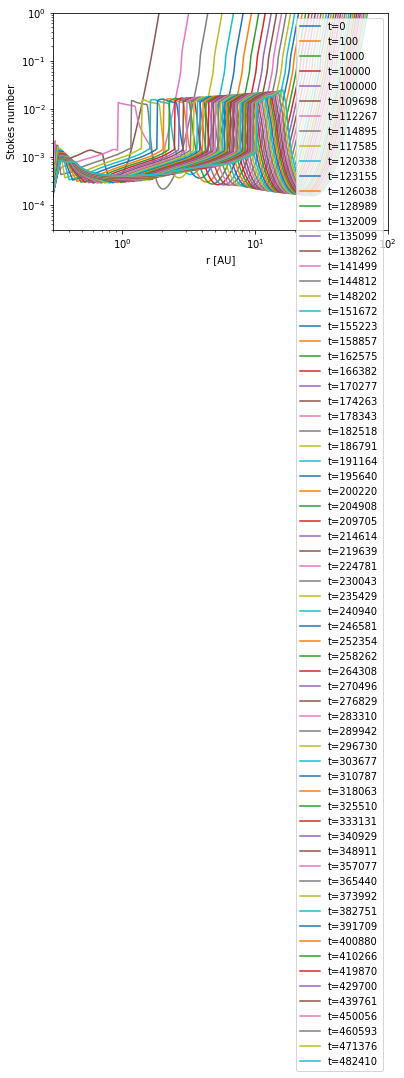

In [6]:
#Stokes number
f, ax = plt.subplots()
for it in range(np.size(time)):
    ax.loglog(q.r/au,q.stokesnr[it,:],label='t={:.0f}'.format(time[it]))
ax.set_xlim(0.3,100)
ax.set_ylim(3.e-5,1)
ax.legend()
ax.set_xlabel('r [AU]')
ax.set_ylabel('Stokes number')
plt.savefig('infall_St.pdf')

Text(0, 0.5, 'sigmad')

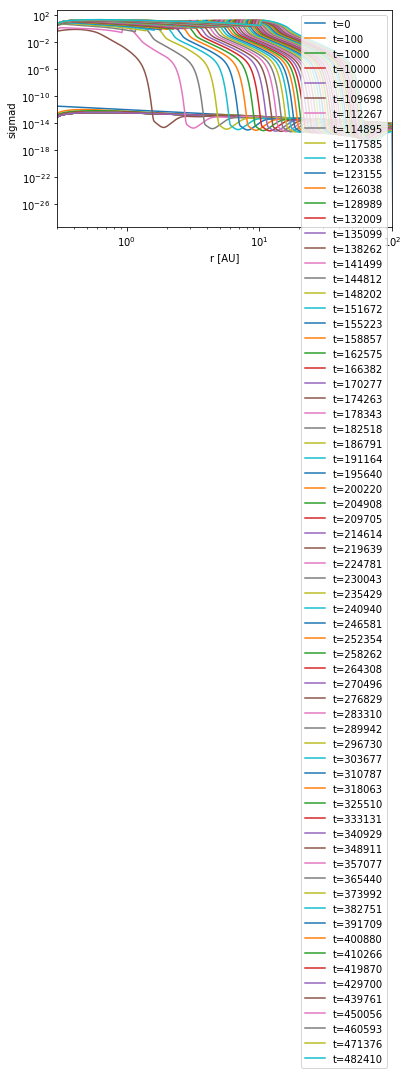

In [7]:
f, ax = plt.subplots()
for it in range(np.size(time)):
    ax.loglog(q.r/au,q.sigmad[it,:],label='t={:.0f}'.format(time[it]))
ax.set_xlim(0.3,100)
#ax.set_ylim(3.e-5,1)
ax.legend()
ax.set_xlabel('r [AU]')
ax.set_ylabel('sigmad')

In [7]:
# pebble flux
# >0 inwards, <0 outwards
pebflux = -2*pi*q.r*q.sigmad*q.vr

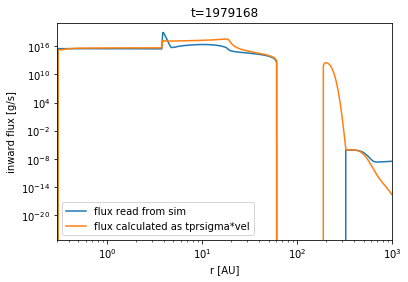

In [9]:
it = 130
f, ax = plt.subplots()
ax.plot(q.r/au,-1.*q.mflux[it,:],label='flux read from sim')
ax.plot(q.r/au,pebflux[it,:],label='flux calculated as tprsigma*vel')
ax.set_xlim(0.3,1000)
#ax.set_ylim(3.e-5,1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(label='t={:.0f}'.format(time[it]))
ax.legend()
ax.set_xlabel('r [AU]')
ax.set_ylabel('inward flux [g/s]')
plt.savefig('mflux.pdf')

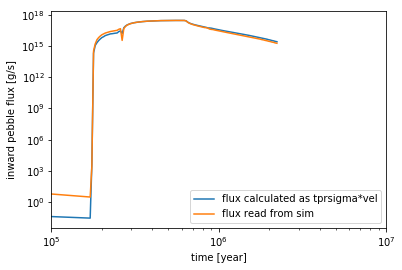

In [20]:
# pebble flux at given position over time
rr = 1.*au
ir = q.r.searchsorted(rr)
f, ax = plt.subplots()
ax.loglog(time,abs(pebflux[:,ir]),label='flux calculated as tprsigma*vel')
ax.loglog(time,abs(q.mflux[:,ir]),label='flux read from sim')
ax.set_xlim(1.e5,1.e7)
#ax.set_ylim(1.e-1,2.e1)
ax.legend()
ax.set_xlabel('time [year]')
ax.set_ylabel('inward pebble flux [g/s]')
plt.savefig('infall_pflux_time_1au.pdf')

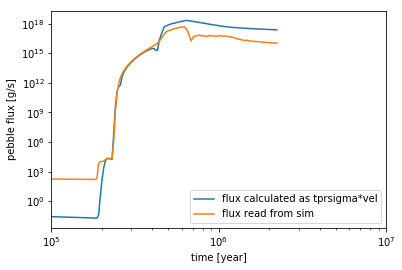

In [19]:
# pebble flux at given position over time
rr = 15.*au
ir = q.r.searchsorted(rr)
f, ax = plt.subplots()
ax.loglog(time,abs(pebflux[:,ir]),label='flux calculated as tprsigma*vel')
ax.loglog(time,abs(q.mflux[:,ir]),label='flux read from sim')
ax.set_xlim(1.e5,1.e7)
ax.legend()
#ax.set_ylim(1.e-1,2.e1)
ax.set_xlabel('time [year]')
ax.set_ylabel('pebble flux [g/s]')
plt.savefig('infall_pflux_time_15au.pdf')

In [11]:
sum(q.mflux[69,:])

-1.1996508782277098e+20

In [10]:
q.r/au

array([2.79148117e-01, 2.82567563e-01, 2.86028895e-01, ...,
       2.01305445e+06, 2.03771351e+06, 2.06267463e+06])

In [11]:
np.size(q.r)

1300